In [37]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [38]:
# 흑백 이미지로 로드합니다.
image = cv2.imread("res/1.jpg", cv2.IMREAD_GRAYSCALE)

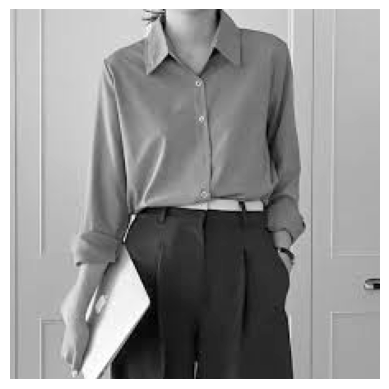

In [39]:
# 이미지를 출력합니다.
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [40]:
# 데이터 타입을 확인합니다.
type(image)

numpy.ndarray

In [41]:
# 이미지 데이터를 확인합니다.
image

array([[203, 200, 188, ..., 192, 192, 193],
       [203, 200, 188, ..., 192, 192, 193],
       [203, 200, 188, ..., 192, 192, 193],
       ...,
       [173, 176, 182, ..., 162, 162, 162],
       [173, 176, 182, ..., 162, 162, 162],
       [176, 172, 183, ..., 162, 162, 161]], dtype=uint8)

In [42]:
# 차원을 확인합니다.
image.shape

(225, 225)

In [43]:
# 컬러로 이미지를 로드합니다.
image_bgr = cv2.imread("res/1.jpg", cv2.IMREAD_COLOR)

# 픽셀을 확인합니다.
image_bgr[0,0]

array([191, 203, 209], dtype=uint8)

In [44]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread("res/1.jpg", cv2.IMREAD_GRAYSCALE)

# 이미지를 저장합니다.
cv2.imwrite("res/12.jpg", image)

True

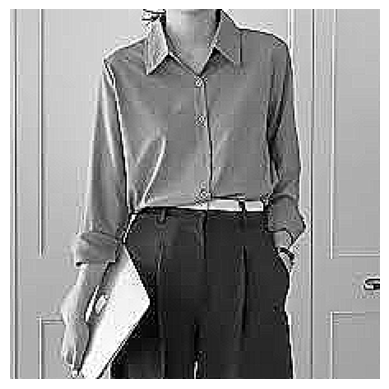

In [49]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread("res/12.jpg", cv2.IMREAD_GRAYSCALE)

# 커널을 만듭니다.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(image, -1, kernel)

# 이미지를 출력합니다.
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

In [95]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
from  PIL  import Image

img = cv.imread('res/0930.jpg', cv.IMREAD_UNCHANGED)
original = img.copy()

l = int(max(5, 6))
u = int(min(6, 6))

ed = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.GaussianBlur(img, (21, 51), 3)
edges = cv.cvtColor(edges, cv.COLOR_BGR2GRAY)
edges = cv.Canny(edges, l, u)

_, thresh = cv.threshold(edges, 0, 255, cv.THRESH_BINARY  + cv.THRESH_OTSU)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
mask = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=4)

data = mask.tolist()
sys.setrecursionlimit(10**8)
for i in  range(len(data)):
    for j in  range(len(data[i])):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
    for j in  range(len(data[i])-1, -1, -1):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
image = np.array(data)
image[image !=  -1] =  255
image[image ==  -1] =  0

mask = np.array(image, np.uint8)

result = cv.bitwise_and(original, original, mask=mask)
result[mask ==  0] =  255
cv.imwrite('res/0930.png', result)

img = Image.open('res/0930.png')
img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] ==  255  and item[1] ==  255  and item[2] ==  255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("0930.png", "PNG")


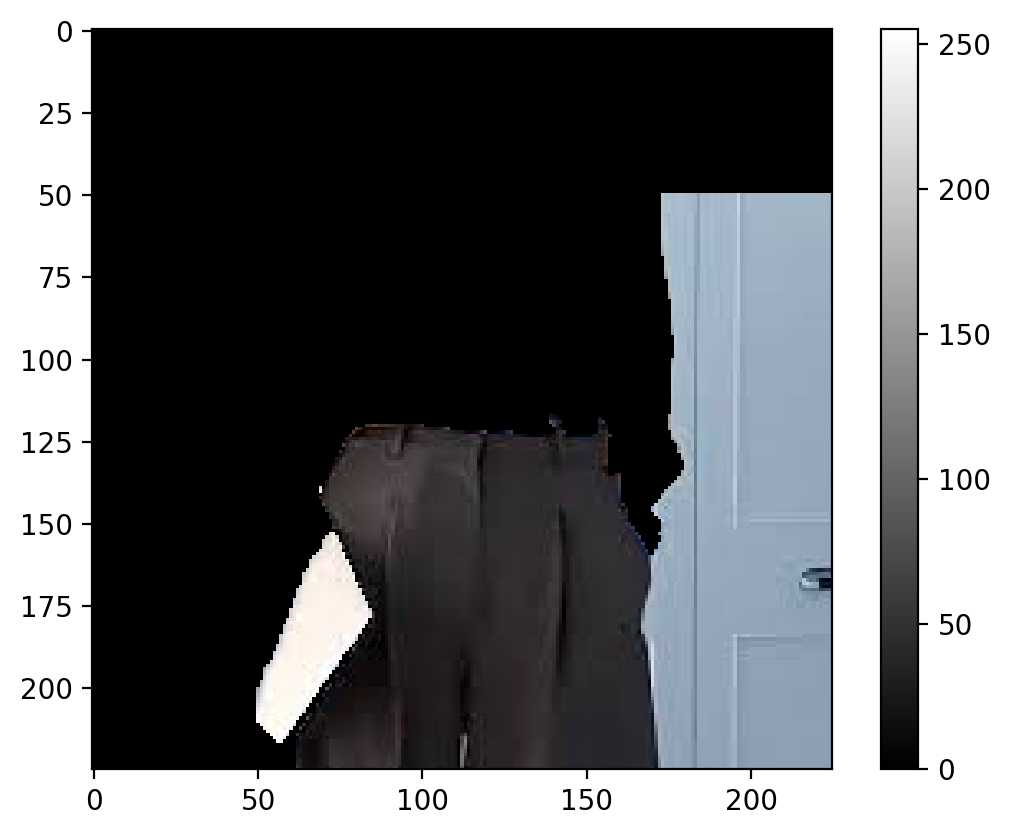

(<matplotlib.image.AxesImage at 0x1e7471ff490>,
 None)

In [96]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('res/1.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

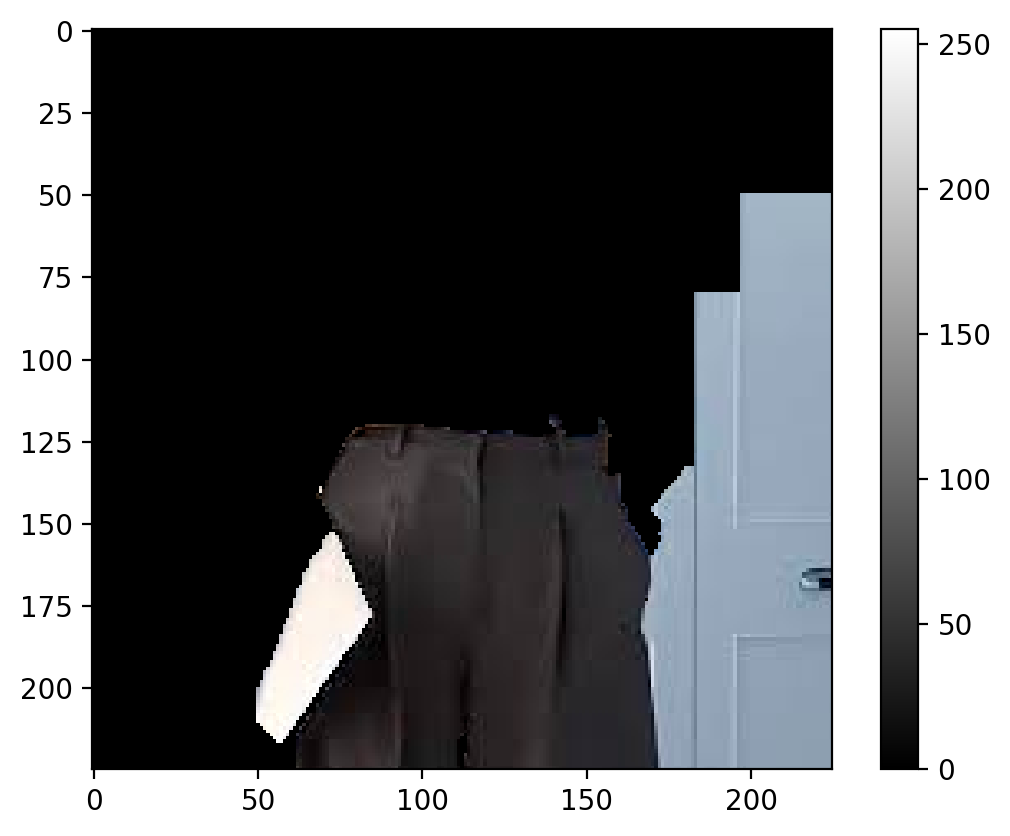

(<matplotlib.image.AxesImage at 0x1e746b7c040>,
 None)

In [94]:
# newmask is the mask image I manually labelled
newmask = cv.imread('res/1.jpg',0)
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [102]:
import os
import sys
import copy
import warnings

import numpy as np
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

from src.models.modnet import MODNet


warnings.filterwarnings("ignore")


class BGRemove():
    # define hyper-parameters
    ref_size = 512

    # define image to tensor transform
    im_transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
    )
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # create MODNet and load the pre-trained ckpt
    modnet = MODNet(backbone_pretrained=False)
    modnet = nn.DataParallel(modnet)
    if device == 'cuda':
        modnet = modnet.cuda()

    def __init__(self, ckpt_path):
        self.parameter_load(ckpt_path)

    def parameter_load(self, ckpt_path):
        BGRemove.modnet.load_state_dict(
            torch.load(ckpt_path, map_location=BGRemove.device))
        BGRemove.modnet.eval()

    def file_load(self, filename):
        im = cv2.imread(filename)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        if len(im.shape) == 2:
            im = im[:, :, None]
        if im.shape[2] == 1:
            im = np.repeat(im, 3, axis=2)
        elif im.shape[2] == 4:
            im = im[:, :, 0:3]

        return im

    def dir_check(self, path):
        os.makedirs(path, exist_ok=True)
        if not path.endswith('/'):
            path += '/'
        return path

    def pre_process(self, im):
        self.original_im = copy.deepcopy(im)

        # convert image to PyTorch tensor
        im = BGRemove.im_transform(im)

        # add mini-batch dim
        im = im[None, :, :, :]

        # resize image for input
        im_b, im_c, im_h, im_w = im.shape
        self.height, self.width = im_h, im_w

        if max(im_h, im_w) < BGRemove.ref_size or min(im_h, im_w) > BGRemove.ref_size:
            if im_w >= im_h:
                im_rh = BGRemove.ref_size
                im_rw = int(im_w / im_h * BGRemove.ref_size)
            elif im_w < im_h:
                im_rw = BGRemove.ref_size
                im_rh = int(im_h / im_w * BGRemove.ref_size)
        else:
            im_rh = im_h
            im_rw = im_w

        im_rw = im_rw - im_rw % 32
        im_rh = im_rh - im_rh % 32
        im = F.interpolate(im, size=(im_rh, im_rw), mode='area')
        if BGRemove.device == 'cuda':
            im = im.cuda()
        return im

    def post_process(self, mask_data, background=False, backgound_path='assets/background/background.jpg'):
        matte = F.interpolate(mask_data, size=(
            self.height, self.width), mode='area')
        matte = matte.repeat(1, 3, 1, 1)
        matte = matte[0].data.cpu().numpy().transpose(1, 2, 0)
        height, width, _ = matte.shape
        if background:
            back_image = self.file_load(backgound_path)
            back_image = cv2.resize(
                back_image, (width, height), cv2.INTER_AREA)
        else:
            back_image = np.full(self.original_im.shape, 255.0)

        self.alpha = np.uint8(matte[:, :, 0]*255)

        matte = matte * self.original_im + (1 - matte) * back_image
        return matte

    def image(self, filename, background=False, output='output/', save=True):
        output = self.dir_check(output)

        self.im_name = filename.split('/')[-1]
        im = self.file_load(filename)
        im = self.pre_process(im)
        _, _, matte = BGRemove.modnet(im, inference=False)
        matte = self.post_process(matte, background)

        if save:
            matte = np.uint8(matte)
            msg, name = self.save(matte, output, background)
            return name
        else:
            h, w, _ = matte.shape
            r_h, r_w = 720, int((w / h) * 720)
            image = cv2.resize(self.original_im, (r_w, r_h), cv2.INTER_AREA)
            matte = cv2.resize(matte, (r_w, r_h), cv2.INTER_AREA)

            full_image = np.uint8(np.concatenate((image, matte), axis=1))
            self.save(full_image, output, background)
            exit_key = ord('q')
            while True:
                if cv2.waitKey(exit_key) & 255 == exit_key:
                    cv2.destroyAllWindows()
                    break
                cv2.imshow(
                    'MODNet - {} [Press "Q" To Exit]'.format(self.im_name), full_image)

    def video(self, filename, background=False, output='output/'):
        output = self.dir_check(output)

        output_name = filename.split('/')[-1]
        extension = output_name.split('.')[-1]
        output_name = output_name.replace(extension, 'mp4')

        fourcc = cv2.VideoWriter_fourcc(*'MP4V')

        cap = cv2.VideoCapture(filename)
        flag = 1
        if (cap.isOpened() == False):
            print("Error opening video stream or file")
        while (cap.isOpened()):
            ret, frame = cap.read()
            if flag:
                height, width, _ = frame.shape
                out = cv2.VideoWriter(output+output_name,
                                      fourcc, 20.0, (2*width, height))
                flag = 0

            if ret:
                print('Video is processing..', end='\r')

                im = self.pre_process(frame)
                _, _, matte = BGRemove.modnet(im, inference=False)
                matte = np.uint8(self.post_process(matte, background))
                full_image = np.concatenate((frame, matte), axis=1)
                full_image = np.uint8(cv2.resize(
                    full_image, (2*width, height), cv2.INTER_AREA))
                out.write(full_image)
            else:
                break
        cap.release()
        out.release()
        cv2.destroyAllWindows()

    def folder(self, foldername, background=False, output='output/'):
        output = self.dir_check(output)
        foldername = self.dir_check(foldername)

        for filename in os.listdir(foldername):
            try:
                self.im_name = filename
                im = self.file_load(foldername+filename)
                im = self.pre_process(im)
                _, _, matte = BGRemove.modnet(im, inference=False)
                matte = self.post_process(matte, background)
                status = self.save(matte, output, background)
                print(status)
            except:
                print('There is an error for {} file/folder'.format(foldername+filename))

    def webcam(self, background=False):
        cap = cv2.VideoCapture(0)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
        width, height = 455, 512

        exit_key = ord('q')
        while(True):
            _, frame_np = cap.read()
            frame_np = cv2.resize(frame_np, (width, height), cv2.INTER_AREA)
            im = self.pre_process(frame_np)
            _, _, matte = BGRemove.modnet(im, inference=False)
            processed_image = self.post_process(matte, background)

            full_image = np.concatenate((frame_np, processed_image), axis=1)
            full_image = np.uint8(cv2.resize(
                full_image, (2*width, height), cv2.INTER_AREA))

            if cv2.waitKey(exit_key) & 255 == exit_key:
                cv2.destroyAllWindows()
                break
            cv2.imshow('MODNet - WebCam [Press "Q" To Exit]', full_image)

    def save(self, matte, output_path='output/', background=False):
        name = '.'.join(self.im_name.split('.')[:-1])+'.png'
        path = os.path.join(output_path, name)

        if background:
            try:
                matte = cv2.cvtColor(matte, cv2.COLOR_RGB2BGR)
                cv2.imwrite(path, matte)
                return "Successfully saved {}".format(path), name
            except:
                return "Error while saving {}".format(path), ''
        else:
            w, h, _ = matte.shape
            png_image = np.zeros((w, h, 4))
            png_image[:, :, :3] = matte
            png_image[:, :, 3] = self.alpha
            png_image = png_image.astype(np.uint8)
            try:
                png_image = cv2.cvtColor(png_image, cv2.COLOR_RGBA2BGRA)
                cv2.imwrite(path, png_image, [
                            int(cv2.IMWRITE_PNG_COMPRESSION), 9])
                return "Successfully saved {}".format(path), name
            except:
                return "Error while saving {}".format(path), ''

ModuleNotFoundError: No module named 'torch'

In [73]:
from rembg.bg import remove
import numpy as np
import io
from PIL import Image

# Uncomment the following lines if working with trucated image formats (ex. JPEG / JPG)
# In my case I do give JPEG images as input, so i'll leave it uncommented
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

input_image = 'input-image.jpg'
output_image = 'output-image.png'

f = np.fromfile(input_image)
result = remove(f)
img = Image.open(io.BytesIO(result)).convert("RGBA")
img.save(output_image)

SyntaxError: invalid syntax (365398844.py, line 1)